In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True 

from scipy import stats
import seaborn as sns
sns.set(palette='deep')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import plotly.express as px

import plotly.graph_objects as go
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import norm
#output_notebook() #specify the Bokeh plots should be embedded within the Jupyter notebook

import warnings
warnings.filterwarnings('ignore')
import csv
import os


import sys
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

import pandas
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
#import graphviz
import matplotlib.pyplot as plt

In [2]:

bank_mkt = pd.read_csv('c:/Users/Asus/Desktop/Juypter Notebook/Data/bank-full.csv', sep=';', encoding='cp1252')




## The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


## Cleaning

In [3]:
bank_mkt

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_mkt.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
bank_mkt['age'].unique()

#Need to put age range into a category and change datatype from numbers to str.

bank_mkt['age'] = bank_mkt['age'].astype(str)

## Overall responses

### Probability Calculations

In [7]:
def responses(x):
    a = []
    b = []
    a_per = 0
    b_per = 0
    total = len(x)
    for i in x:
        if i == 'yes':
            a.append(i)
        else:
            b.append(i)
    a_per = round((len(a)/total) * 100, ndigits=2)
    b_per = round((len(b)/total) * 100, ndigits=2)
    return print('positive:', a_per, 'negative:',b_per)
        

In [8]:
overall_list = list(bank_mkt['y'])

responses(overall_list)

# Dataframe for jobs and response
overall = ['subscribed', 'did not subscribed']
Positive_response_overall = [11.7]
negative_response_overall = [88.3]
zipped = list(zip(overall, Positive_response_overall, negative_response_overall))
overall_df = pd.DataFrame(zipped, columns=['overall_Rsp', 'Pos_Rsp %', 'Neg_Rsp %'])
overall_df


positive: 11.7 negative: 88.3


,overall_Rsp,Pos_Rsp %,Neg_Rsp %
0,subscribed,11.7,88.3


In [9]:
# Will need to make mutiple dataframes with different conditions.
bank_mkt['job'].unique()
# job data frames: 'management', 'technician', 'entrepreneur', 'blue-collar','unknown', 'retired', 'admin.', 'services', 'self-employed','unemployed', 'housemaid', 'student'
mgmt = bank_mkt[bank_mkt['job'] == 'management']
mgmt_list = list(mgmt['y'])
tech = bank_mkt[bank_mkt['job'] == 'technician']
tech_list = list(tech['y'])
entr = bank_mkt[bank_mkt['job'] == 'entrepreneur']
entr_list = list(entr['y'])
blue = bank_mkt[bank_mkt['job'] == 'blue-collar']
blue_list = list(blue['y'])
unk = bank_mkt[bank_mkt['job'] == 'unknown']
unk_list = list(unk['y'])
ret = bank_mkt[bank_mkt['job'] == 'retired']
ret_list = list(ret['y'])
admin = bank_mkt[bank_mkt['job'] == 'admin.']
admin_list = list(admin['y'])
srvcs = bank_mkt[bank_mkt['job'] == 'services']
srvcs_list = list(srvcs['y'])
selfemployed = bank_mkt[bank_mkt['job'] == 'self-employed']
selfemployed_list = list(selfemployed['y'])
unemployed = bank_mkt[bank_mkt['job'] == 'unemployed']
unemployed_list = list(unemployed['y'])
maid = bank_mkt[bank_mkt['job'] == 'housemaid']
maid_list = list(maid['y'])
student = bank_mkt[bank_mkt['job'] == 'student']
student_list = list(student['y'])



In [10]:
# Responses based on jobs:
responses(mgmt_list)
responses(tech_list)
responses(entr_list)
responses(blue_list)
responses(unk_list)
responses(ret_list)
responses(admin_list)
responses(srvcs_list)
responses(selfemployed_list)
responses(unemployed_list)
responses(maid_list)
responses(student_list)

# Dataframe for jobs and response
jobs = ['management', 'technician', 'entrepreneur', 'blue-collar','unknown', 'retired', 'admin', 'services', 'self-employed','unemployed', 'housemaid', 'student']
Positive_response = [13.76, 11.06, 8.27, 7.27, 11.81, 22.79, 12.20, 8.88, 11.84, 15.50, 8.79, 28.68]
negative_response = [86.24, 88.94, 91.73, 92.73, 88.19, 77.21, 87.8, 91.12, 88.16, 84.50, 91.21, 71.32]
zipped = list(zip(jobs, Positive_response, negative_response))
jobs_df = pd.DataFrame(zipped, columns=['Jobs', 'Pos_Rsp %', 'Neg_Rsp %'])
jobs_df





positive: 13.76 negative: 86.24
positive: 11.06 negative: 88.94
positive: 8.27 negative: 91.73
positive: 7.27 negative: 92.73
positive: 11.81 negative: 88.19
positive: 22.79 negative: 77.21
positive: 12.2 negative: 87.8
positive: 8.88 negative: 91.12
positive: 11.84 negative: 88.16
positive: 15.5 negative: 84.5
positive: 8.79 negative: 91.21
positive: 28.68 negative: 71.32


,Jobs,Pos_Rsp %,Neg_Rsp %
0,management,13.76,86.24
1,technician,11.06,88.94
2,entrepreneur,8.27,91.73
3,blue-collar,7.27,92.73
4,unknown,11.81,88.19
5,retired,22.79,77.21
6,admin,12.20,87.80
7,services,8.88,91.12
8,self-employed,11.84,88.16
9,unemployed,15.50,84.50


In [11]:
#marital

bank_mkt['marital'].unique()
'married', 'single', 'divorced'

marr = bank_mkt[bank_mkt['marital'] == 'married']
marr_list = list(marr['y'])

sngl = bank_mkt[bank_mkt['marital'] == 'single']
sngl_list = list(sngl['y'])

div = bank_mkt[bank_mkt['marital'] == 'divorced']
div_list = list(div['y'])


responses(marr_list)
responses(sngl_list)
responses(div_list)


marital_stat = ['married', 'single', 'divorced']
Positive_response_marital = [10.12, 14.95, 11.95]
negative_response_marital = [89.88, 85.05, 88.05]
zipped = list(zip(marital_stat, Positive_response_marital, negative_response_marital))
marital_df = pd.DataFrame(zipped, columns=['marital status', 'Pos_Rsp %', 'Neg_Rsp %'])
marital_df


positive: 10.12 negative: 89.88
positive: 14.95 negative: 85.05
positive: 11.95 negative: 88.05


,marital status,Pos_Rsp %,Neg_Rsp %
0,married,10.12,89.88
1,single,14.95,85.05
2,divorced,11.95,88.05


In [12]:
bank_mkt['education'].unique()
'tertiary', 'secondary', 'unknown', 'primary'

ter = bank_mkt[bank_mkt['education'] == 'tertiary']
ter_list = list(ter['y'])

scndry = bank_mkt[bank_mkt['education'] == 'secondary']
scndry_list = list(scndry['y'])

ukn_edu = bank_mkt[bank_mkt['education'] == 'unknown']
ukn_edu_list = list(ukn_edu['y'])

pri = bank_mkt[bank_mkt['education'] == 'primary']
pri_list = list(pri['y'])

responses(ter_list)
responses(scndry_list)
responses(ukn_edu_list)
responses(pri_list)

educ_stat = ['tertiary', 'secondary', 'unknown', 'primary' ]
positive_response_educ = [15.01, 10.56, 13.57, 8.63]
negative_response_educ = [84.99, 89.44, 86.43, 91.37]
zipped = list(zip(educ_stat, positive_response_educ, negative_response_educ))
educ_df = pd.DataFrame(zipped, columns=['education', 'Pos_Rsp %', 'Neg_Rsp %'])
educ_df


positive: 15.01 negative: 84.99
positive: 10.56 negative: 89.44
positive: 13.57 negative: 86.43
positive: 8.63 negative: 91.37


,education,Pos_Rsp %,Neg_Rsp %
0,tertiary,15.01,84.99
1,secondary,10.56,89.44
2,unknown,13.57,86.43
3,primary,8.63,91.37


In [13]:
#Default 
bank_mkt['default'].unique()
'no', 'yes'

no_def = bank_mkt[bank_mkt['default'] == 'no']
no_def_list = list(no_def['y'])

yes_def = bank_mkt[bank_mkt['default'] == 'yes']
yes_def_list = list(yes_def['y'])

responses(no_def_list)
responses(yes_def_list)

default = ['no', 'yes']
positive_response_def = [11.8, 6.38]
negative_response_def = [88.2, 93.62]
zipped = list(zip(default, positive_response_def, negative_response_def))
def_df = pd.DataFrame(zipped, columns=['default', 'Pos_Rsp %', 'Neg_Rsp %'])
def_df




positive: 11.8 negative: 88.2
positive: 6.38 negative: 93.62


,default,Pos_Rsp %,Neg_Rsp %
0,no,11.80,88.20
1,yes,6.38,93.62


In [14]:
#housing
bank_mkt['housing'].unique()
'no', 'yes'

no_house = bank_mkt[bank_mkt['housing'] == 'no']
no_house_list = list(no_house['y'])

yes_house = bank_mkt[bank_mkt['housing'] == 'yes']
yes_house_list = list(yes_house['y'])

responses(no_house_list)
responses(yes_house_list)

housing = ['no', 'yes']
positive_response_house = [16.7, 7.7]
negative_response_house = [83.3, 92.3]
zipped = list(zip(housing, positive_response_house, negative_response_house))
hou_df = pd.DataFrame(zipped, columns=['housing', 'Pos_Rsp %', 'Neg_Rsp %'])
hou_df

positive: 16.7 negative: 83.3
positive: 7.7 negative: 92.3


,housing,Pos_Rsp %,Neg_Rsp %
0,no,16.7,83.3
1,yes,7.7,92.3


In [15]:
#loan
bank_mkt['loan'].unique()
'no', 'yes'

no_loan = bank_mkt[bank_mkt['loan'] == 'no']
no_loan_list = list(no_loan['y'])

yes_loan = bank_mkt[bank_mkt['loan'] == 'yes']
yes_loan_list = list(yes_loan['y'])

responses(no_loan_list)
responses(yes_loan_list)

loan= ['no', 'yes']
positive_response_loan = [12.66, 6.68]
negative_response_loan = [87.34, 93.32]
zipped = list(zip(loan, positive_response_loan, negative_response_loan))
loan_df = pd.DataFrame(zipped, columns=['loan', 'Pos_Rsp %', 'Neg_Rsp %'])
loan_df

positive: 12.66 negative: 87.34
positive: 6.68 negative: 93.32


,loan,Pos_Rsp %,Neg_Rsp %
0,no,12.66,87.34
1,yes,6.68,93.32


In [16]:
#contact
bank_mkt['contact'].unique()
'unknown', 'cellular', 'telephone'

unk_contact = bank_mkt[bank_mkt['contact'] == 'unknown']
unk_contact_list = list(unk_contact['y'])

MP_contact = bank_mkt[bank_mkt['contact'] == 'cellular']
MP_contact_list = list(MP_contact['y'])

tel_contact = bank_mkt[bank_mkt['contact'] == 'telephone']
tel_contact_list = list(tel_contact['y'])

responses(unk_contact_list)
responses(MP_contact_list)
responses(tel_contact_list)

contact = ['unknown', 'cellular', 'telephone']
positive_response_contact = [4.07, 14.92, 13.42]
negative_response_contact = [95.93, 85.08, 86.58]
zipped = list(zip(contact, positive_response_contact, negative_response_contact))
contact_df = pd.DataFrame(zipped, columns=['contact', 'Pos_Rsp %', 'Neg_Rsp %'])
contact_df

positive: 4.07 negative: 95.93
positive: 14.92 negative: 85.08
positive: 13.42 negative: 86.58


,contact,Pos_Rsp %,Neg_Rsp %
0,unknown,4.07,95.93
1,cellular,14.92,85.08
2,telephone,13.42,86.58


In [17]:
#poutcome
bank_mkt['poutcome'].unique()
'unknown', 'failure', 'other', 'success'

unk_poutcome = bank_mkt[bank_mkt['poutcome'] == 'unknown']
unk_potcome_list = list(unk_poutcome['y'])

fl_poutcome = bank_mkt[bank_mkt['poutcome'] == 'failure']
fl_poutcome_list = list(fl_poutcome['y'])

other_poutcome = bank_mkt[bank_mkt['poutcome'] == 'other']
other_poutcome_list = list(other_poutcome ['y'])

scs_poutcome = bank_mkt[bank_mkt['poutcome'] == 'success']
scs_poutcome_list = list(scs_poutcome['y'])

responses(unk_potcome_list)
responses(fl_poutcome_list)
responses(other_poutcome_list)
responses(scs_poutcome_list)

poutcome = ['unknown', 'failure', 'other', 'success']
positive_response_poutcome = [9.16, 12.61, 16.68, 64.73]
negative_response_poutcome = [90.84, 87.39, 83.32, 35.27]
zipped = list(zip(poutcome, positive_response_poutcome, negative_response_poutcome))
poutcome_df = pd.DataFrame(zipped, columns=['poutcome', 'Pos_Rsp %', 'Neg_Rsp %'])
poutcome_df

positive: 9.16 negative: 90.84
positive: 12.61 negative: 87.39
positive: 16.68 negative: 83.32
positive: 64.73 negative: 35.27


,poutcome,Pos_Rsp %,Neg_Rsp %
0,unknown,9.16,90.84
1,failure,12.61,87.39
2,other,16.68,83.32
3,success,64.73,35.27


In [18]:
bank_mkt[bank_mkt['y'] == 'yes']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [19]:

bank_mkt['age'].astype(str).astype(int)
bank_mkt['age'].unique()


array(['58', '44', '33', '47', '35', '28', '42', '43', '41', '29', '53',
       '57', '51', '45', '60', '56', '32', '25', '40', '39', '52', '46',
       '36', '49', '59', '37', '50', '54', '55', '48', '24', '38', '31',
       '30', '27', '34', '23', '26', '61', '22', '21', '20', '66', '62',
       '83', '75', '67', '70', '65', '68', '64', '69', '72', '71', '19',
       '76', '85', '63', '90', '82', '73', '74', '78', '80', '94', '79',
       '77', '86', '95', '81', '18', '89', '84', '87', '92', '93', '88'],
      dtype=object)

In [20]:
def age_groups(age):
    if int(age) < 30:
        return '18-29'
    elif int(age) < 40:
        return '30-39'
    elif int(age) < 50:
        return '40-49'
    elif int(age) < 60:
        return '50-59'
    elif int(age) < 70:
        return '60-69'
    elif int(age) >=70:
        return '70+'
    else:
        return 'Unknown'


In [21]:
bank_mkt.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [22]:
bank_mkt['Age Groups'] = bank_mkt['age'].apply(age_groups)

#CardioGoodFitness_df['age_groups'] = CardioGoodFitness_df['Age'].apply(age_groups)
bank_mkt
#age_marketing = bank_mkt(['y', 'Age Groups']).sum()
age_marketing = bank_mkt.copy()
age_marketing = age_marketing.drop(columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'])
#age_marketing = age_marketing.reset_index()
age_marketing = age_marketing[age_marketing['Age Groups'] != 'Unknown']
age_marketing['Age Groups'].unique()
age_marketing


,y,Age Groups
0,no,50-59
1,no,40-49
2,no,30-39
3,no,40-49
4,no,30-39
...,...,...
45206,yes,50-59
45207,yes,70+
45208,yes,70+
45209,no,50-59


In [23]:
age_marketing['Age Groups'].unique()
'18-29', '30-39', '40-49', '50-59', '60-69', '70+', 'Unknown'

young_age = bank_mkt[age_marketing['Age Groups'] == '18-29']
young_age_list = list(young_age['y'])

thirty_age = bank_mkt[age_marketing['Age Groups'] == '30-39']
thirty_age_list = list(thirty_age['y'])

fourty_age = bank_mkt[age_marketing['Age Groups'] == '40-49']
fourty_age_list = list(fourty_age['y'])

fifty_age = bank_mkt[age_marketing['Age Groups'] == '50-59']
fifty_age_list = list(fifty_age['y'])

sixty_age = bank_mkt[age_marketing['Age Groups'] == '60-69']
sixty_age_list = list(sixty_age['y'])

old_age = bank_mkt[age_marketing['Age Groups'] == '70+']
old_age_list = list(old_age['y'])



responses(young_age_list)
responses(thirty_age_list)
responses(fourty_age_list)
responses(fifty_age_list)
responses(sixty_age_list)
responses(old_age_list)


age = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
positive_response_age = [17.6, 10.58, 9.12, 9.33, 29.67, 42.42]
negative_response_age = [82.4, 89.42, 90.88, 90.67, 70.33, 57.58]
zipped = list(zip(age, positive_response_age, negative_response_age))
age_df = pd.DataFrame(zipped, columns=['age groups', 'Pos_Rsp %', 'Neg_Rsp %'])
age_df



positive: 17.6 negative: 82.4
positive: 10.58 negative: 89.42
positive: 9.12 negative: 90.88
positive: 9.33 negative: 90.67
positive: 29.67 negative: 70.33
positive: 42.42 negative: 57.58


,age groups,Pos_Rsp %,Neg_Rsp %
0,18-29,17.60,82.40
1,30-39,10.58,89.42
2,40-49,9.12,90.88
3,50-59,9.33,90.67
4,60-69,29.67,70.33
5,70+,42.42,57.58


In [24]:
bank_mkt['balance'].unique()

def balance(x):
    if x < 50:
        return 'less than 50'
    elif x < 100:
        return 'less than 100'
    elif x < 500:
        return 'less than 500'
    elif x < 1000:
        return 'less thank 1000'
    elif x < 10000:
        return 'less than 10,000'
    elif x >=10000:
        return '10,000+'
    else:
        return 'Unknown'


In [25]:
balance_marketing = bank_mkt.copy()
balance_marketing['balance groups'] = balance_marketing['balance'].apply(balance)



balance_marketing = balance_marketing.drop(columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome','Age Groups'])

balance_marketing

balance_marketing['balance groups'].unique()
'less than 50', 'less than 100', 'less than 500', 'less thank 1000', 'less than 10,000', '10,000+'

less_than_50_balance = balance_marketing[balance_marketing['balance groups'] == 'less than 50']
less_than_50_balance_list = list(less_than_50_balance['y'])

less_than_100_balance = balance_marketing[balance_marketing['balance groups'] == 'less than 100']
less_than_100_balance_list = list(less_than_100_balance['y'])

less_than_500_balance = balance_marketing[balance_marketing['balance groups']== 'less than 500']
less_than_500_balance_list = list(less_than_500_balance['y'])

less_than_1000_balance = balance_marketing[balance_marketing['balance groups'] == 'less thank 1000']
less_than_1000_balance_list = list(less_than_1000_balance['y'])

less_than_10000_balance = balance_marketing[balance_marketing['balance groups'] == 'less than 10,000']
less_than_10000_balance_list = list(less_than_10000_balance['y'])

more_than_10000_balance = balance_marketing[balance_marketing['balance groups'] == '10,000+']
more_than_10000_balance_list = list(more_than_10000_balance['y'])



responses(less_than_50_balance_list)
responses(less_than_100_balance_list)
responses(less_than_500_balance_list)
responses(less_than_1000_balance_list)
responses(less_than_10000_balance_list)
responses(more_than_10000_balance_list)


balance = ['less than 50', 'less than 100', 'less than 500', 'less than 1000', 'less than 10,000', '10,000+']
positive_response_balance = [6.99, 9.09, 11.33, 12.32, 15.33, 16.28]
negative_response_balance = [93.01, 90.91, 88.67, 87.68, 84.67, 83.72]
zipped = list(zip(balance, positive_response_balance, negative_response_balance))
balance_df = pd.DataFrame(zipped, columns=['balance groups', 'Pos_Rsp %', 'Neg_Rsp %'])
balance_df



positive: 6.99 negative: 93.01
positive: 9.09 negative: 90.91
positive: 11.33 negative: 88.67
positive: 12.32 negative: 87.68
positive: 15.33 negative: 84.67
positive: 16.28 negative: 83.72


,balance groups,Pos_Rsp %,Neg_Rsp %
0,less than 50,6.99,93.01
1,less than 100,9.09,90.91
2,less than 500,11.33,88.67
3,less than 1000,12.32,87.68
4,"less than 10,000",15.33,84.67
5,"10,000+",16.28,83.72


In [26]:
bank_mkt['duration'].unique()


def duration(x):
    if x < 50:
        return 'less than 50'
    elif x < 100:
        return 'less than 100'
    elif x < 500:
        return 'less than 500'
    elif x < 1000:
        return 'less thank 1000'
    elif x < 10000:
        return 'less than 10000'
    elif x >=10000:
        return '10000+'
    else:
        return 'Unknown'

In [27]:
duration_marketing = bank_mkt.copy()
duration_marketing['duration groups'] = duration_marketing['duration'].apply(duration)



duration_marketing = duration_marketing.drop(columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome','Age Groups'])

duration_marketing

duration_marketing['duration groups'].unique()
'less than 50', 'less than 100', 'less than 500', 'less thank 1000', 'less than 10000', '10000+'

less_than_50_duration = duration_marketing[duration_marketing['duration groups'] == 'less than 50']
less_than_50_duration_list = list(less_than_50_duration['y'])

less_than_100_duration = duration_marketing[duration_marketing['duration groups'] == 'less than 100']
less_than_100_duration_list = list(less_than_100_duration['y'])

less_than_500_duration = duration_marketing[duration_marketing['duration groups'] == 'less than 500']
less_than_500_duration_list = list(less_than_500_duration['y'])

less_than_1000_duration = duration_marketing[duration_marketing['duration groups'] == 'less thank 1000']
less_than_1000_duration_list = list(less_than_1000_duration['y'])

less_than_10000_duration = duration_marketing[duration_marketing['duration groups'] == 'less than 10000']
less_than_10000_duration_list = list(less_than_10000_duration['y'])

more_than_10000_duration = duration_marketing[duration_marketing['duration groups'] == '10000+']
more_than_10000_duration_list = list(more_than_10000_duration['y'])



responses(less_than_50_duration_list)
responses(less_than_100_duration_list)
responses(less_than_500_duration_list)
responses(less_than_1000_duration_list)
responses(less_than_10000_duration_list)
#responses(more_than_10000_duration_list)


duration = ['less than 50', 'less than 100', 'less than 500', 'less than 1000', 'less than 10,000', '10,000+']
positive_response_duration = [0.26, 1.44, 9.95, 38.01, 59.83]
negative_response_duration = [99.74, 98.56, 90.05, 61.66, 40.17]
zipped = list(zip(duration, positive_response_duration, negative_response_duration))
duration_df = pd.DataFrame(zipped, columns=['duration groups', 'Pos_Rsp %', 'Neg_Rsp %'])
duration_df


positive: 0.26 negative: 99.74
positive: 1.44 negative: 98.56
positive: 9.95 negative: 90.05
positive: 38.01 negative: 61.99
positive: 59.83 negative: 40.17


,duration groups,Pos_Rsp %,Neg_Rsp %
0,less than 50,0.26,99.74
1,less than 100,1.44,98.56
2,less than 500,9.95,90.05
3,less than 1000,38.01,61.66
4,"less than 10,000",59.83,40.17


In [28]:
bank_mkt['campaign'].unique()


def campaign(x):
    if x < 5:
        return 'less than 5'
    elif x < 10:
        return 'less than 10'
    elif x < 20:
        return 'less than 20'
    elif x < 30:
        return 'less than 30'
    elif x < 40:
        return 'less than 40'
    elif x >=40:
        return '40+'
    else:
        return 'Unknown'

In [29]:
campaign_marketing = bank_mkt.copy()
campaign_marketing['campaign groups'] = campaign_marketing['campaign'].apply(campaign)



campaign_marketing = campaign_marketing.drop(columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome','Age Groups'])

campaign_marketing

campaign_marketing['campaign groups'].unique()
'less than 5', 'less than 10', 'less than 20', 'less than 30', 'less than 40', '40+'

less_than_5_campaign = campaign_marketing[campaign_marketing['campaign groups'] == 'less than 5']
less_than_5_campaign_list = list(less_than_5_campaign['y'])

less_than_10_campaign = campaign_marketing[campaign_marketing['campaign groups'] == 'less than 10']
less_than_10_campaign_list = list(less_than_10_campaign['y'])

less_than_20_campaign = campaign_marketing[campaign_marketing['campaign groups'] == 'less than 20']
less_than_20_campaign_list = list(less_than_20_campaign['y'])

less_than_30_campaign = campaign_marketing[campaign_marketing['campaign groups'] == 'less than 30']
less_than_30_campaign_list = list(less_than_30_campaign['y'])

less_than_40_campaign = campaign_marketing[campaign_marketing['campaign groups'] == 'less than 40']
less_than_40_campaign_list = list(less_than_40_campaign['y'])

more_than_40_campaign = campaign_marketing[campaign_marketing['campaign groups'] == '40+']
more_than_40_campaign_list = list(more_than_40_campaign['y'])



responses(less_than_5_campaign_list)
responses(less_than_10_campaign_list)
responses(less_than_20_campaign_list)
responses(less_than_30_campaign_list)
responses(less_than_40_campaign_list)
responses(more_than_40_campaign_list)


campaign = ['less than 5', 'less than 10', 'less than 20', 'less than 30', 'less than 40', '40+']
positive_response_campaign = [12.53, 7.11, 4.77, 1.82, 1.85, 0]
negative_response_campaign = [87.47, 92.89, 95.23, 98.18, 98.15, 100.0]
zipped = list(zip(campaign, positive_response_campaign, negative_response_campaign))
campaign_df = pd.DataFrame(zipped, columns=['campaign groups', 'Pos_Rsp %', 'Neg_Rsp %'])
campaign_df


positive: 12.53 negative: 87.47
positive: 7.11 negative: 92.89
positive: 4.77 negative: 95.23
positive: 1.82 negative: 98.18
positive: 1.85 negative: 98.15
positive: 0.0 negative: 100.0


,campaign groups,Pos_Rsp %,Neg_Rsp %
0,less than 5,12.53,87.47
1,less than 10,7.11,92.89
2,less than 20,4.77,95.23
3,less than 30,1.82,98.18
4,less than 40,1.85,98.15
5,40+,0.00,100.00


In [30]:
bank_mkt['previous'].unique()


def previous(x):
    if x < 1:
        return 'less than 1'
    elif x < 5:
        return 'less than 5'
    elif x < 10:
        return 'less than 10'
    elif x < 20:
        return 'less than 20'
    elif x < 50:
        return 'less than 50'
    elif x >=50:
        return '50+'
    else:
        return 'Unknown'

In [31]:
previous_marketing = bank_mkt.copy()
previous_marketing['previous groups'] = previous_marketing['previous'].apply(previous)



previous_marketing = previous_marketing.drop(columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome','Age Groups'])

previous_marketing['previous groups'].unique()
'less than 1', 'less than 5', 'less than 20', 'less than 10', 'less than 50', '50+'

less_than_1_previous = previous_marketing[previous_marketing['previous groups'] == 'less than 1']
less_than_1_previous_list = list(less_than_1_previous['y'])

less_than_5_previous = previous_marketing[previous_marketing['previous groups'] == 'less than 5']
less_than_5_previous_list = list(less_than_5_previous['y'])

less_than_10_previous = previous_marketing[previous_marketing['previous groups'] == 'less than 10']
less_than_10_previous_list = list(less_than_10_previous['y'])

less_than_20_previous = previous_marketing[previous_marketing['previous groups'] == 'less than 20']
less_than_20_previous_list = list(less_than_20_previous['y'])

less_than_50_previous = previous_marketing[previous_marketing['previous groups'] == 'less than 50']
less_than_50_previous_list = list(less_than_50_previous['y'])

more_than_50_previous = previous_marketing[previous_marketing['previous groups'] == '50+']
more_than_50_previous_list = list(more_than_50_previous['y'])



responses(less_than_1_previous_list)
responses(less_than_5_previous_list)
responses(less_than_10_previous_list)
responses(less_than_20_previous_list)
responses(less_than_50_previous_list)
responses(more_than_50_previous_list)


previous = ['less than 1', 'less than 5', 'less than 10', 'less than 20', 'less than 50', '50+']
positive_response_previous = [9.16, 22.33, 27.62, 23.83, 11.86, 50.0]
negative_response_previous = [90.84, 77.67, 72.38, 76.17, 88.14, 50.0]
zipped = list(zip(previous, positive_response_previous, negative_response_previous))
previous_df = pd.DataFrame(zipped, columns=['previous groups', 'Pos_Rsp %', 'Neg_Rsp %'])
previous_df


positive: 9.16 negative: 90.84
positive: 22.33 negative: 77.67
positive: 27.62 negative: 72.38
positive: 23.83 negative: 76.17
positive: 11.86 negative: 88.14
positive: 50.0 negative: 50.0


,previous groups,Pos_Rsp %,Neg_Rsp %
0,less than 1,9.16,90.84
1,less than 5,22.33,77.67
2,less than 10,27.62,72.38
3,less than 20,23.83,76.17
4,less than 50,11.86,88.14
5,50+,50.00,50.00


In [32]:


age_df = age_df.set_index('age groups')
age_df_avg = round(age_df.mean(), ndigits=2)
balance_df = balance_df.set_index('balance groups')
balance_df_avg = round(balance_df.mean(), ndigits=2)
duration_df = duration_df.set_index('duration groups')
duration_df_avg = round(balance_df.mean(), ndigits=2)
campaign_df = campaign_df.set_index('campaign groups')
campaign_df_avg = round(campaign_df.mean(), ndigits=2)
previous_df = previous_df.set_index('previous groups')
previous_df_avg = round(previous_df.mean(), ndigits=2)                     
jobs_df = jobs_df.set_index('Jobs')
jobs_df_avg = round(jobs_df.mean(), ndigits=2)
marital_df = marital_df.set_index('marital status')
marital_df_avg = round(marital_df.mean(), ndigits=2)
educ_df = educ_df.set_index('education')
educ_df_avg = round(educ_df.mean(), ndigits=2)
def_df = def_df.set_index('default')
def_df_avg = round(def_df.mean(), ndigits=2)
hou_df = hou_df.set_index('housing')
hou_df_avg = round(hou_df.mean(), ndigits=2)
loan_df = loan_df.set_index('loan')
loan_df_avg = round(loan_df.mean(), ndigits=2)
contact_df = contact_df.set_index('contact')
contact_df_avg = round(contact_df.mean(), ndigits=2)
poutcome_df = poutcome_df.set_index('poutcome')
poutcome_df_avg = round(poutcome_df.mean(), ndigits=2)

age_df_avg = pd.DataFrame({'Age Groups':age_df_avg})
balance_df_avg = pd.DataFrame({'Balance Groups':balance_df_avg})
duration_df_avg = pd.DataFrame({'Duration Groups':duration_df_avg})
campaign_df_avg = pd.DataFrame({'Campaign groups':campaign_df_avg})
previous_df_avg = pd.DataFrame({'No. of contacts performed before this campaign':previous_df_avg})
jobs_df_avg = pd.DataFrame({'Jobs':jobs_df_avg})
marital_df_avg = pd.DataFrame({'Marital Status':marital_df_avg})
educ_df_avg = pd.DataFrame({'Education':educ_df_avg})
def_df_avg = pd.DataFrame({'Default':def_df_avg})
hou_df_avg = pd.DataFrame({'Housing':hou_df_avg})
loan_df_avg = pd.DataFrame({'Loan':loan_df_avg})
contact_df_avg = pd.DataFrame({'Contact Methods':contact_df_avg})
poutcome_df_avg = pd.DataFrame({'Previous Outcome':poutcome_df_avg})

catergories_mean= [age_df_avg, balance_df_avg, duration_df_avg, campaign_df_avg, previous_df_avg, jobs_df_avg, marital_df_avg, educ_df_avg, def_df_avg, hou_df_avg, loan_df_avg, contact_df_avg, poutcome_df_avg]
categories_outcome_mean = pd.concat(catergories_mean, axis=1)
categories_outcome_mean = categories_outcome_mean.rename({'Pos_Rsp %': 'Pos Rsp % mean', 'Neg_Rsp %': 'Neg Rsp % mean'}, axis=0)
categories_outcome_mean = categories_outcome_mean.transpose()
categories_outcome_mean = categories_outcome_mean.reset_index()
categories_outcome_mean = categories_outcome_mean.rename({'index': 'Categories'},axis=1)
categories_outcome_mean


,Categories,Pos Rsp % mean,Neg Rsp % mean
0,Age Groups,19.79,80.21
1,Balance Groups,11.89,88.11
2,Duration Groups,11.89,88.11
3,Campaign groups,4.68,95.32
4,No. of contacts performed before this campaign,24.13,75.87
5,Jobs,13.40,86.60
6,Marital Status,12.34,87.66
7,Education,11.94,88.06
8,Default,9.09,90.91
9,Housing,12.20,87.80


In [33]:


age_df_median = round(age_df.median(), ndigits=2)

balance_df_median = round(balance_df.median(), ndigits=2)

duration_df_median = round(balance_df.median(), ndigits=2)

campaign_df_median = round(campaign_df.median(), ndigits=2)

previous_df_median = round(previous_df.median(), ndigits=2)                     

jobs_df_median = round(jobs_df.median(), ndigits=2)

marital_df_median = round(marital_df.median(), ndigits=2)

educ_df_median = round(educ_df.median(), ndigits=2)

def_df_median = round(def_df.median(), ndigits=2)

hou_df_median = round(hou_df.median(), ndigits=2)

loan_df_median = round(loan_df.median(), ndigits=2)

contact_df_median = round(contact_df.median(), ndigits=2)

poutcome_df_median = round(poutcome_df.median(), ndigits=2)

age_df_median = pd.DataFrame({'Age Groups':age_df_median})
balance_df_median = pd.DataFrame({'Balance Groups':balance_df_median})
duration_df_median = pd.DataFrame({'Duration Groups':duration_df_median})
campaign_df_median = pd.DataFrame({'Campaign Groups':campaign_df_median})
previous_df_median = pd.DataFrame({'Contacts performed before this campaign groups':previous_df_median})
jobs_df_median = pd.DataFrame({'Jobs':jobs_df_median})
marital_df_median = pd.DataFrame({'Marital Status':marital_df_median})
educ_df_median = pd.DataFrame({'Education':educ_df_median})
def_df_median = pd.DataFrame({'Default':def_df_median})
hou_df_median = pd.DataFrame({'Housing':hou_df_median})
loan_df_median = pd.DataFrame({'Loan':loan_df_median})
contact_df_median = pd.DataFrame({'Contact Methods':contact_df_median})
poutcome_df_median = pd.DataFrame({'Previous Outcome':poutcome_df_median})

categories_median = [age_df_median, balance_df_median, duration_df_median, campaign_df_median, previous_df_median, jobs_df_median, marital_df_median, educ_df_median, def_df_median, hou_df_median, loan_df_median, contact_df_median, poutcome_df_median]
categories_outcome_median = pd.concat(categories_median,axis=1)
categories_outcome_median = categories_outcome_median.rename({'Pos_Rsp %': 'Pos Rsp % median', 'Neg_Rsp %': 'Neg Rsp % median'},axis=0)
categories_outcome_median = categories_outcome_median.transpose()
categories_outcome_median = categories_outcome_median.reset_index()
categories_outcome_median = categories_outcome_median.rename({'index': 'Categories'},axis=1)
categories_outcome_median


,Categories,Pos Rsp % median,Neg Rsp % median
0,Age Groups,14.09,85.91
1,Balance Groups,11.82,88.18
2,Duration Groups,11.82,88.18
3,Campaign Groups,3.31,96.69
4,Contacts performed before this campaign groups,23.08,76.92
5,Jobs,11.82,88.18
6,Marital Status,11.95,88.05
7,Education,12.07,87.94
8,Default,9.09,90.91
9,Housing,12.20,87.80


# Visualisation

## Overall response

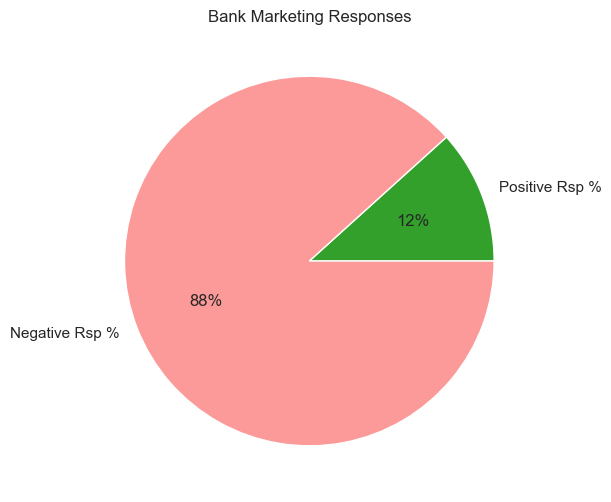

In [34]:

overall_df
plt.figure(figsize=(6, 6))
colors = sns.color_palette("Paired")[3:6]

data = [11.7, 88.3]
labels = ['Positive Rsp %', 'Negative Rsp %']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Bank Marketing Responses')
plt.show()

## Negative Response

In [35]:
jobs_df

jobs_df_neg = jobs_df.sort_values(['Neg_Rsp %'], ascending=[False])
marital_df_neg = marital_df.sort_values(['Neg_Rsp %'], ascending=[False])
educ_df_neg = educ_df.sort_values(['Neg_Rsp %'], ascending=[False])
def_df_neg = def_df.sort_values(['Neg_Rsp %'], ascending=[False])
hou_df_neg = hou_df.sort_values(['Neg_Rsp %'], ascending=[False])
loan_df_neg = loan_df.sort_values(['Neg_Rsp %'], ascending=[False])
contact_df_neg = contact_df.sort_values(['Neg_Rsp %'], ascending=[False])
poutcome_df_neg = poutcome_df.sort_values(['Neg_Rsp %'], ascending=[False])
age_df_neg = age_df.sort_values(['Neg_Rsp %'], ascending=[False])
balance_df_neg = balance_df.sort_values(['Neg_Rsp %'], ascending=[False])
duration_df_neg = duration_df.sort_values(['Neg_Rsp %'], ascending=[False])
campaign_df_neg = campaign_df.sort_values(['Neg_Rsp %'], ascending=[False])  
previous_df_neg = previous_df.sort_values(['Neg_Rsp %'], ascending=[False])

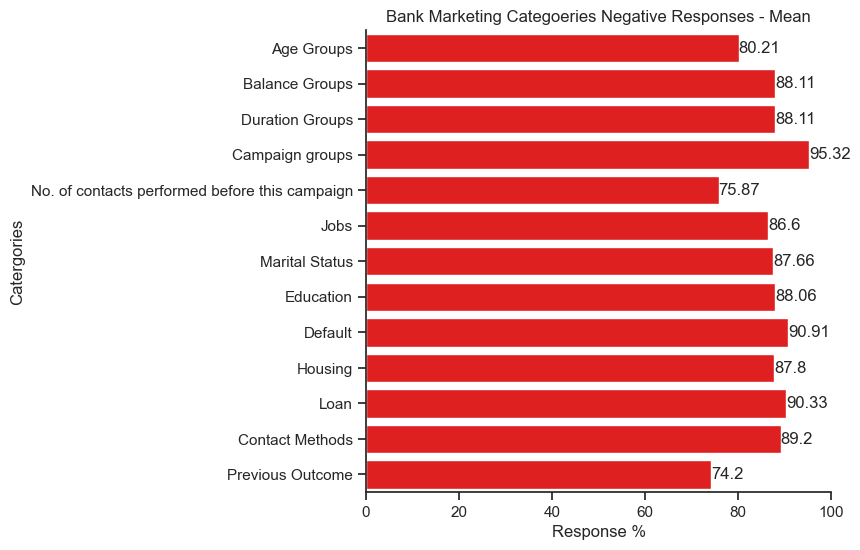

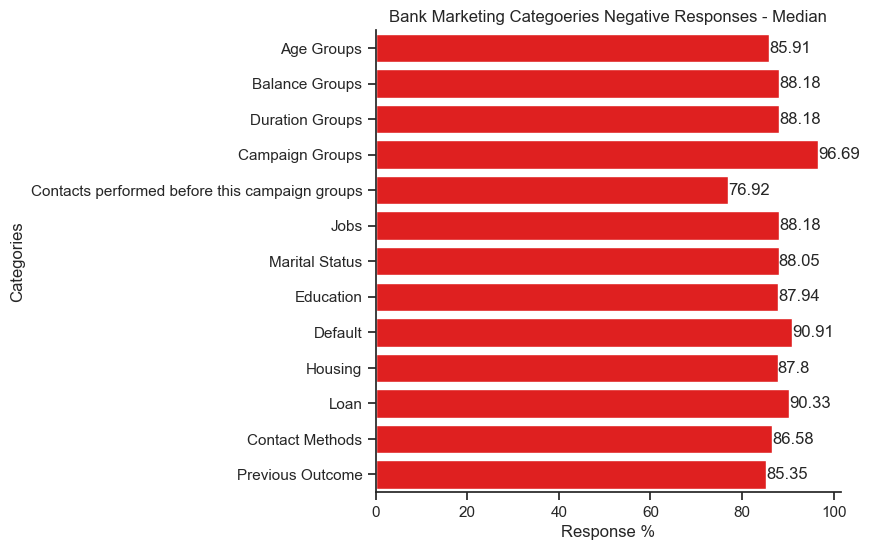

In [36]:
#categories_outcome_mean
#categories_outcome_median

sns.set(style="white") 
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

plt.figure(figsize=(6, 6))

g= sns.barplot(
    data=categories_outcome_mean,
     x="Neg Rsp % mean", y='Categories', orient="h", color='red', width=0.8 )

for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Categoeries Negative Responses - Mean')
plt.xlabel('Response %')
plt.ylabel('Catergories')
plt.show()

plt.figure(figsize=(6, 6))
g= sns.barplot(
    data=categories_outcome_median,
    x="Neg Rsp % median", y='Categories', color='red', width=0.8 )

for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Categoeries Negative Responses - Median')
plt.xlabel('Response %')
plt.ylabel('Categories')
plt.show()


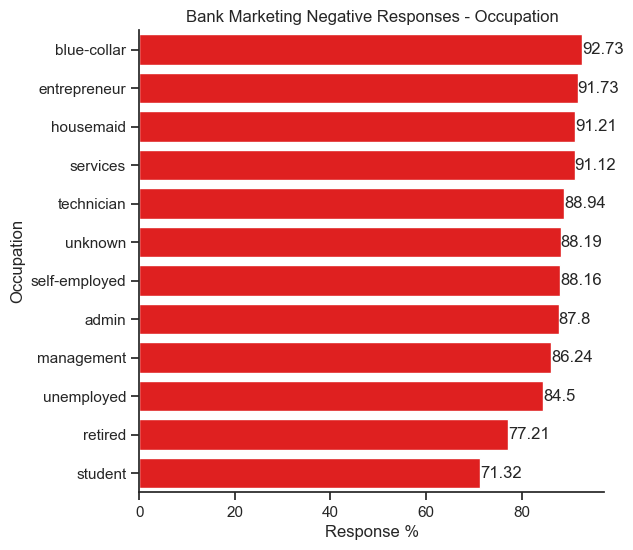

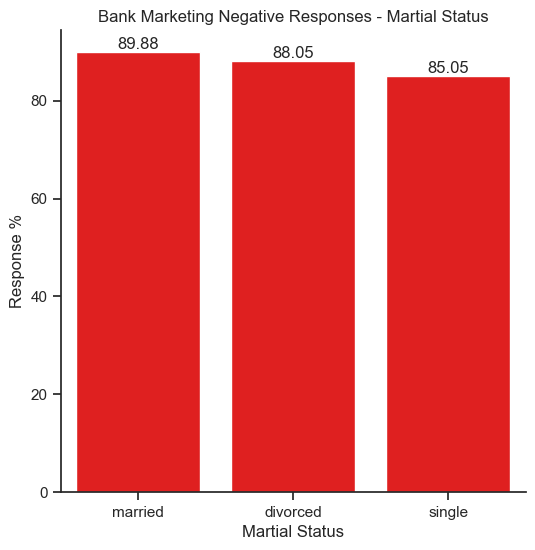

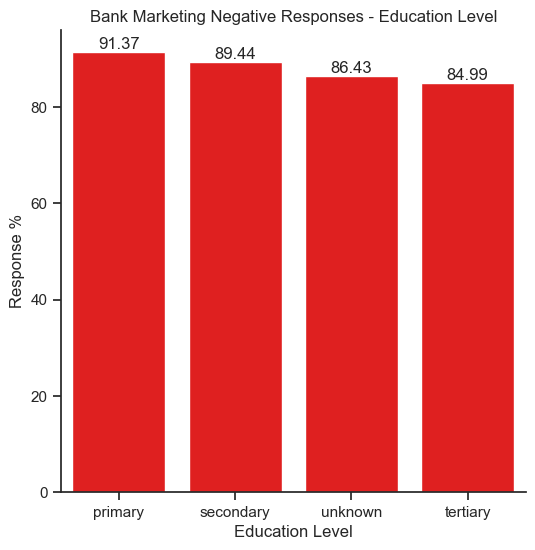

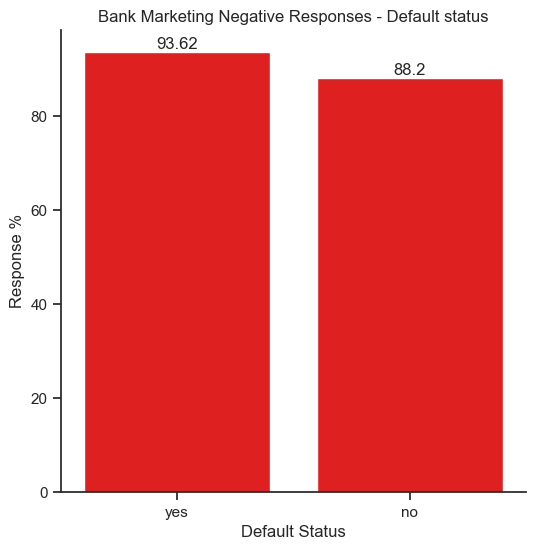

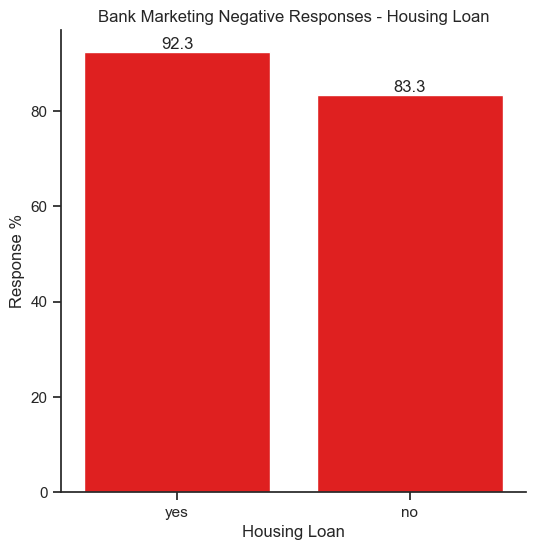

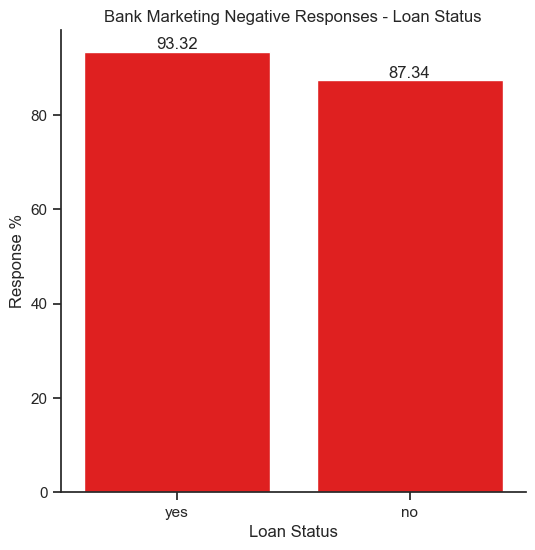

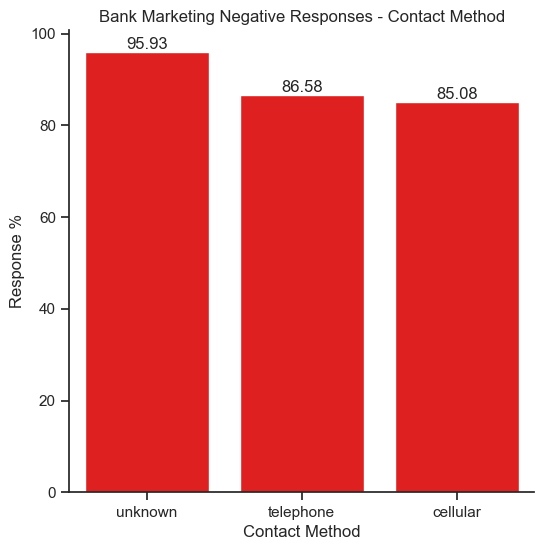

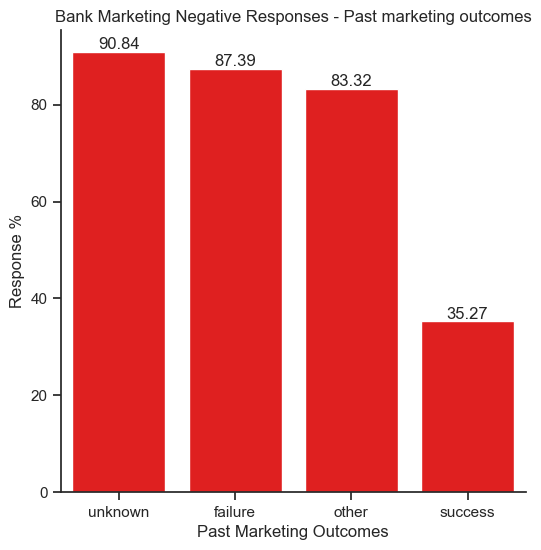

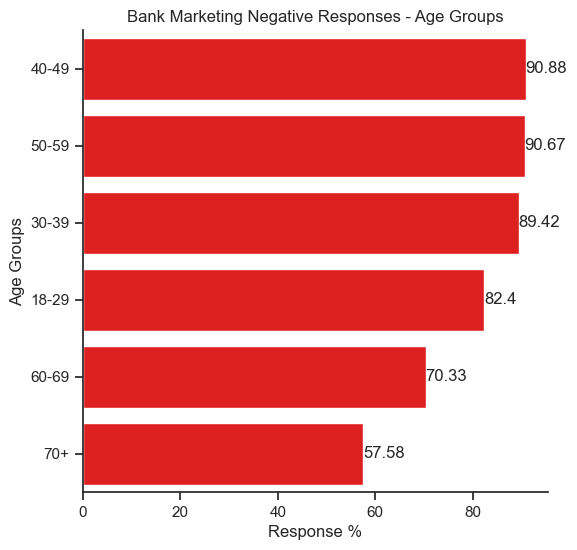

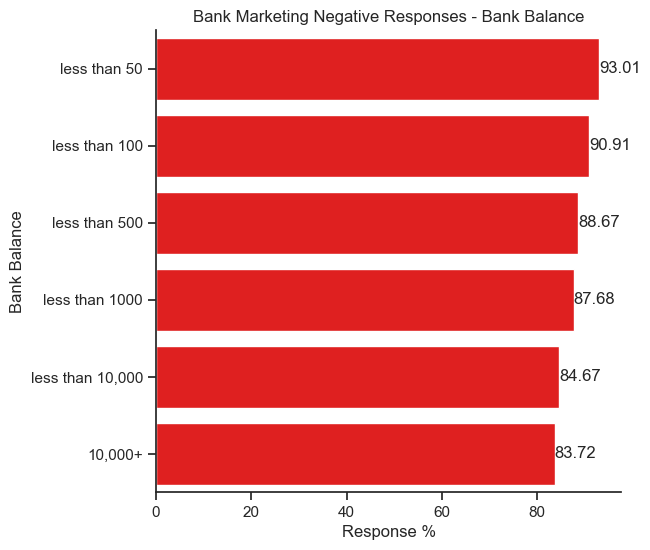

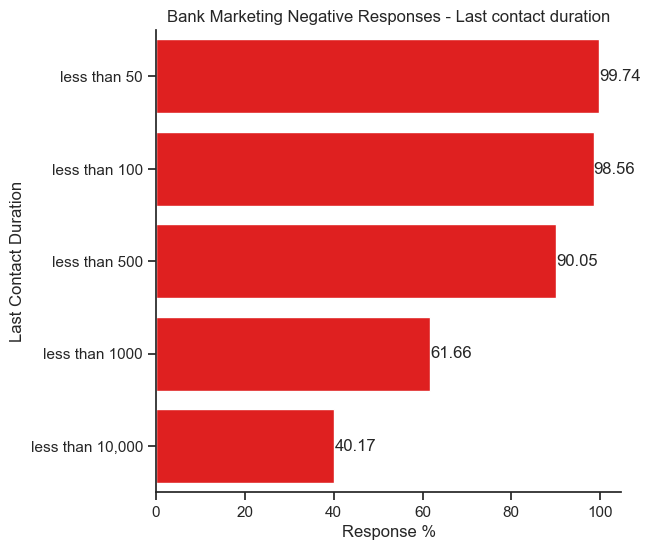

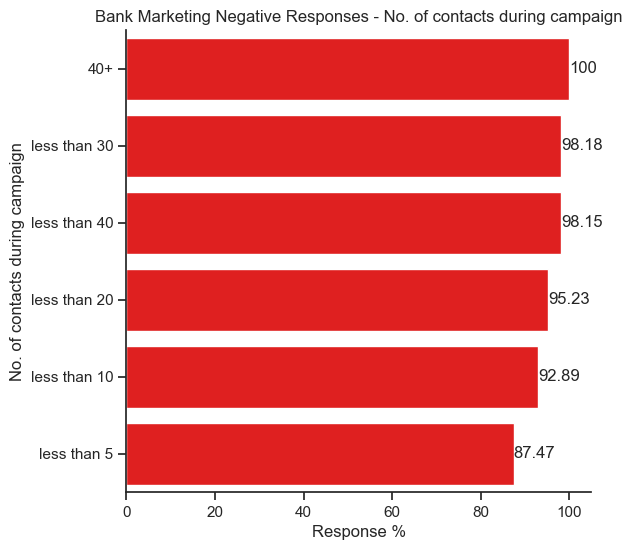

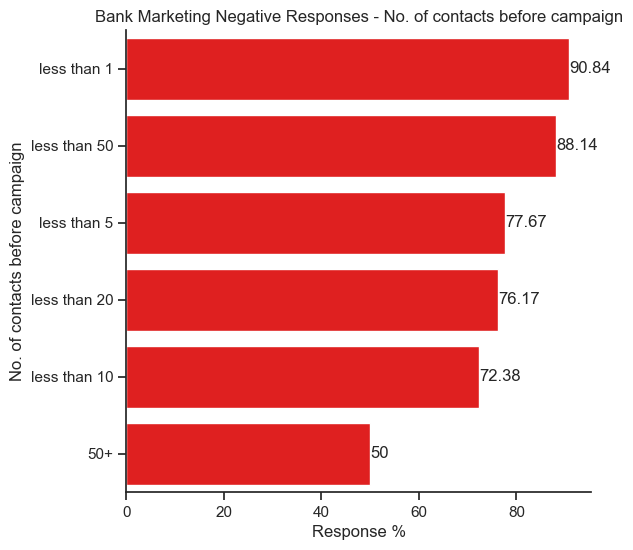

In [37]:
sns.set(style="white") 
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

plt.figure(figsize=(6, 6))

g= sns.barplot(
    data=jobs_df_neg,
    y="Jobs", x="Neg_Rsp %", orient="h", color='red', width=0.8 )

for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Negative Responses - Occupation')
plt.xlabel('Response %')
plt.ylabel('Occupation')
plt.show()

plt.figure(figsize=(6, 6))
g= sns.barplot(
    data=marital_df_neg,
    x="marital status", y="Neg_Rsp %", color='red', width=0.8 )

for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Negative Responses - Martial Status')
plt.ylabel('Response %')
plt.xlabel('Martial Status')
plt.show()

plt.figure(figsize=(6, 6))
g= sns.barplot(
    data=educ_df_neg,
    x="education", y="Neg_Rsp %", color='red', width=0.8 )
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Negative Responses - Education Level')
plt.ylabel('Response %')
plt.xlabel('Education Level')
plt.show()

plt.figure(figsize=(6, 6))
g= sns.barplot(
    data=def_df_neg,
    x="default", y="Neg_Rsp %", color='red', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Negative Responses - Default status')
plt.ylabel('Response %')
plt.xlabel('Default Status')
plt.show()

plt.figure(figsize=(6, 6))
g= sns.barplot(
    data=hou_df_neg,
    x="housing", y="Neg_Rsp %", color='red', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Negative Responses - Housing Loan')
plt.ylabel('Response %')
plt.xlabel('Housing Loan')
plt.show()

plt.figure(figsize=(6, 6))
g= sns.barplot(
    data=loan_df_neg,
    x="loan", y="Neg_Rsp %", color='red', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Negative Responses - Loan Status')
plt.ylabel('Response %')
plt.xlabel('Loan Status')
plt.show()

plt.figure(figsize=(6, 6))
g = sns.barplot(
    data=contact_df_neg,
    x="contact", y="Neg_Rsp %", color='red', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Negative Responses - Contact Method')
plt.ylabel('Response %')
plt.xlabel('Contact Method')
plt.show()

plt.figure(figsize=(6, 6))
g = sns.barplot(
    data=poutcome_df_neg,
    x="poutcome", y="Neg_Rsp %", color='red', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Negative Responses - Past marketing outcomes')
plt.ylabel('Response %')
plt.xlabel('Past Marketing Outcomes')
plt.show()

plt.figure(figsize=(6, 6))
g = sns.barplot(
    data=age_df_neg,
    y="age groups", x="Neg_Rsp %", orient="h", color='red', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Negative Responses - Age Groups')
plt.xlabel('Response %')
plt.ylabel('Age Groups')   
plt.show()

plt.figure(figsize=(6, 6))
g = sns.barplot(
    data=balance_df_neg,
    y="balance groups", x="Neg_Rsp %", orient="h", color='red', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Negative Responses - Bank Balance')
plt.xlabel('Response %')
plt.ylabel('Bank Balance') 
plt.show()

plt.figure(figsize=(6, 6))
g = sns.barplot(
    data=duration_df_neg,
    y="duration groups", x="Neg_Rsp %", orient="h", color='red', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Negative Responses - Last contact duration')
plt.xlabel('Response %')
plt.ylabel('Last Contact Duration') 
plt.show()

plt.figure(figsize=(6, 6))
g = sns.barplot(
    data=campaign_df_neg,
    y="campaign groups", x="Neg_Rsp %", orient="h", color='red', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Negative Responses - No. of contacts during campaign')
plt.xlabel('Response %')
plt.ylabel('No. of contacts during campaign') 
plt.show()

plt.figure(figsize=(6, 6))
g = sns.barplot(
    data=previous_df_neg,
    y="previous groups", x="Neg_Rsp %", orient="h", color='red', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Negative Responses - No. of contacts before campaign')
plt.xlabel('Response %')
plt.ylabel('No. of contacts before campaign') 
plt.show()

## Positive response

In [38]:
jobs_df_pos = jobs_df.sort_values(["Pos_Rsp %"], ascending=[False])
marital_df_pos = marital_df.sort_values(["Pos_Rsp %"], ascending=[False])
educ_df_pos = educ_df.sort_values(["Pos_Rsp %"], ascending=[False])
def_df_pos = def_df.sort_values(["Pos_Rsp %"], ascending=[False])
hou_df_pos = hou_df.sort_values(["Pos_Rsp %"], ascending=[False])
loan_df_pos = loan_df.sort_values(["Pos_Rsp %"], ascending=[False])
contact_df_pos = contact_df.sort_values(["Pos_Rsp %"], ascending=[False])
poutcome_df_pos = poutcome_df.sort_values(["Pos_Rsp %"], ascending=[False])
age_df_pos = age_df.sort_values(["Pos_Rsp %"], ascending=[False])
balance_df_pos = balance_df.sort_values(["Pos_Rsp %"], ascending=[False])
duration_df_pos = duration_df.sort_values(["Pos_Rsp %"], ascending=[False])
campaign_df_pos = campaign_df.sort_values(["Pos_Rsp %"], ascending=[False])  
previous_df_pos = previous_df.sort_values(["Pos_Rsp %"], ascending=[False])
balance_df_pos

,Pos_Rsp %,Neg_Rsp %
balance groups,,
"10,000+",16.28,83.72
"less than 10,000",15.33,84.67
less than 1000,12.32,87.68
less than 500,11.33,88.67
less than 100,9.09,90.91
less than 50,6.99,93.01


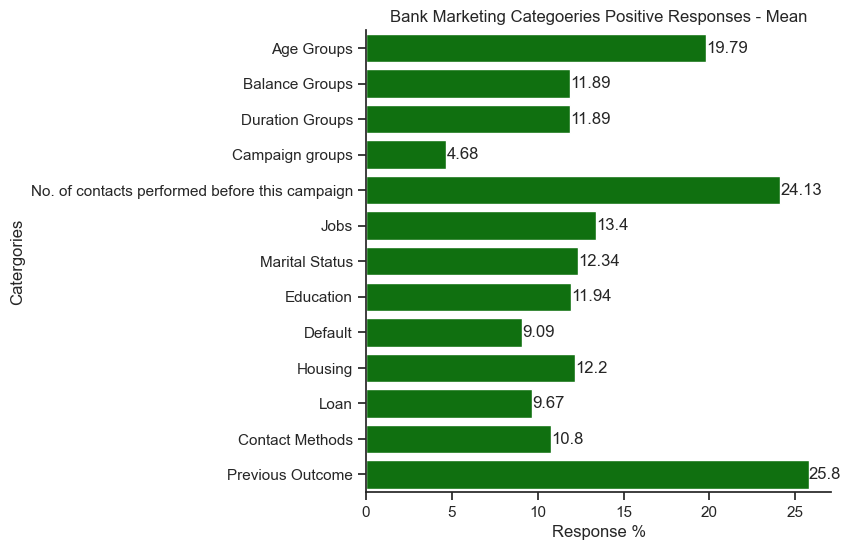

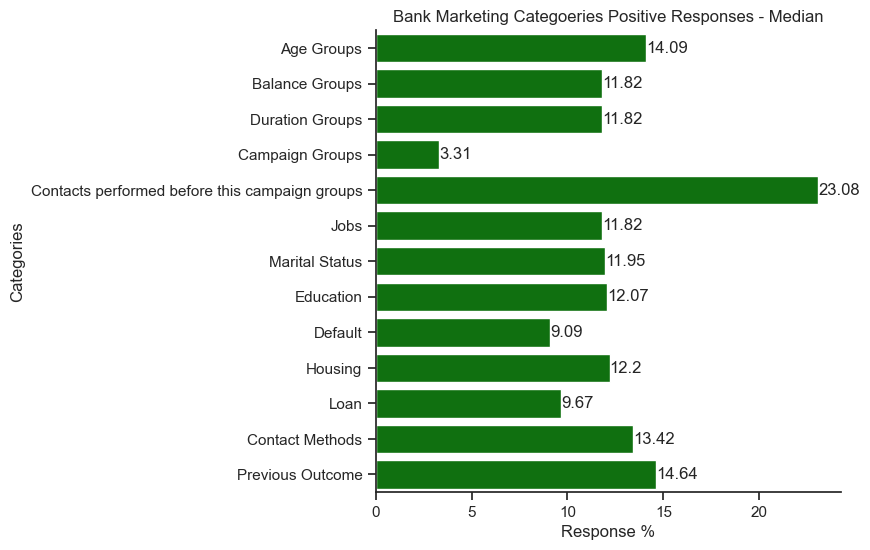

In [39]:
#categories_outcome_mean
#categories_outcome_median

sns.set(style="white") 
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

plt.figure(figsize=(6, 6))

g= sns.barplot(
    data=categories_outcome_mean,
     x="Pos Rsp % mean", y='Categories', orient="h", color='green', width=0.8 )

for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Categoeries Positive Responses - Mean')
plt.xlabel('Response %')
plt.ylabel('Catergories')
plt.show()

plt.figure(figsize=(6, 6))
g= sns.barplot(
    data=categories_outcome_median,
    x="Pos Rsp % median", y='Categories', color='green', width=0.8 )

for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Categoeries Positive Responses - Median')
plt.xlabel('Response %')
plt.ylabel('Categories')
plt.show()

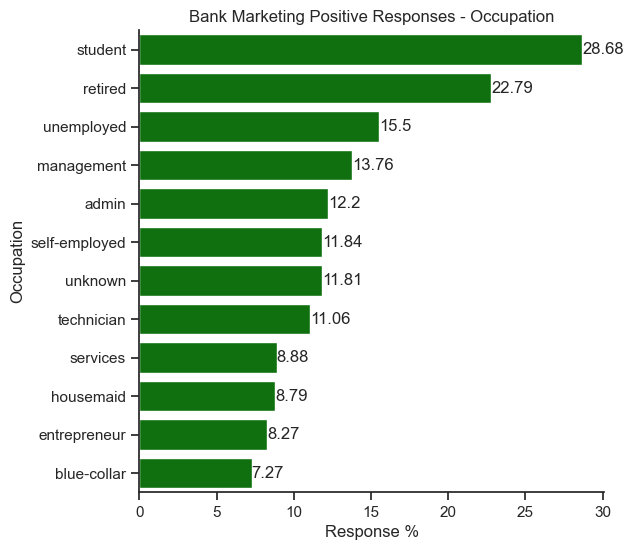

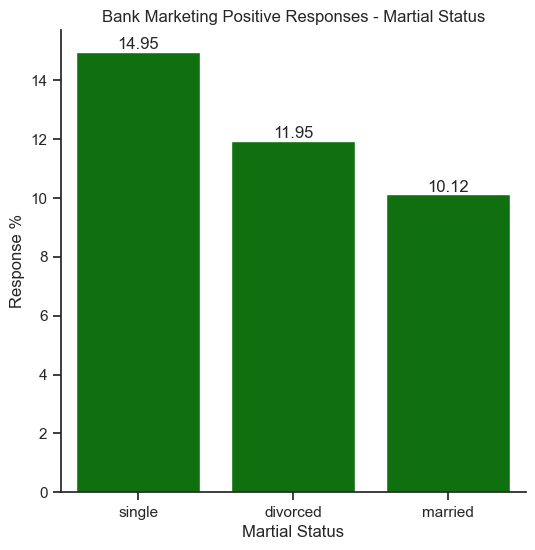

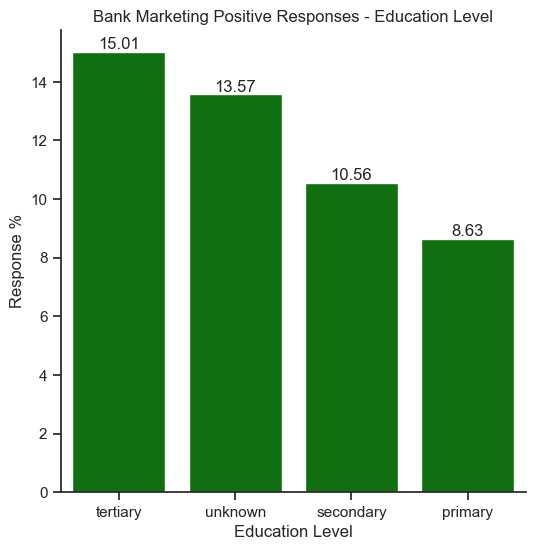

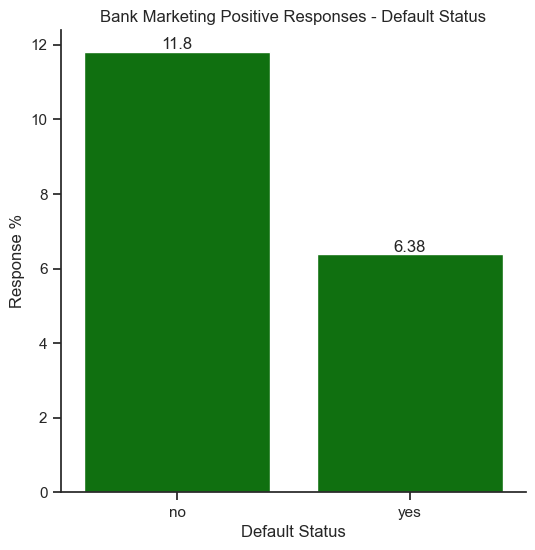

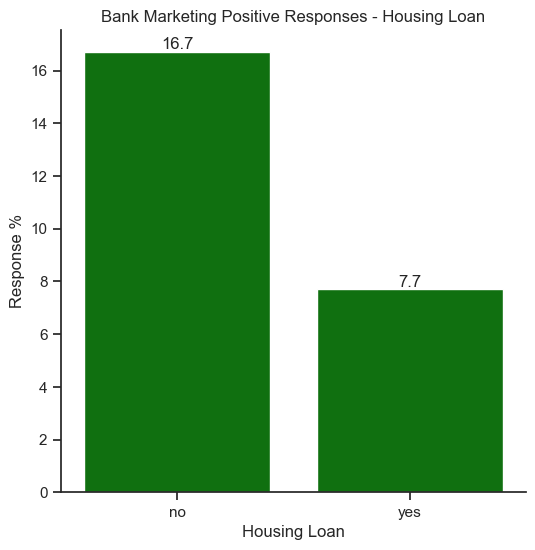

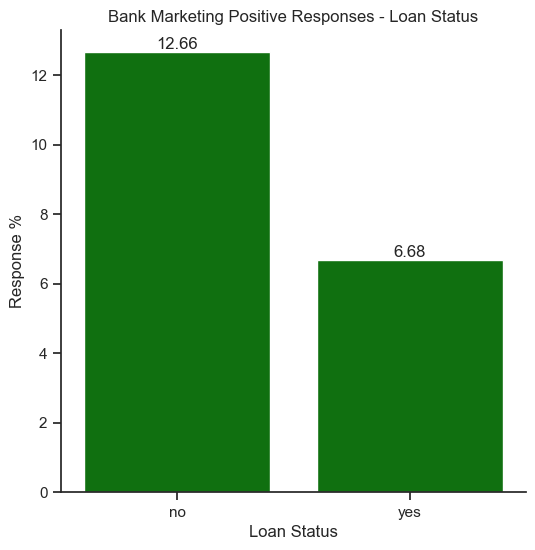

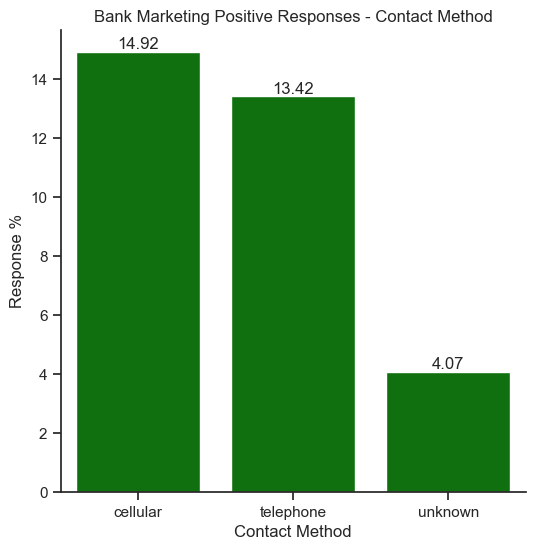

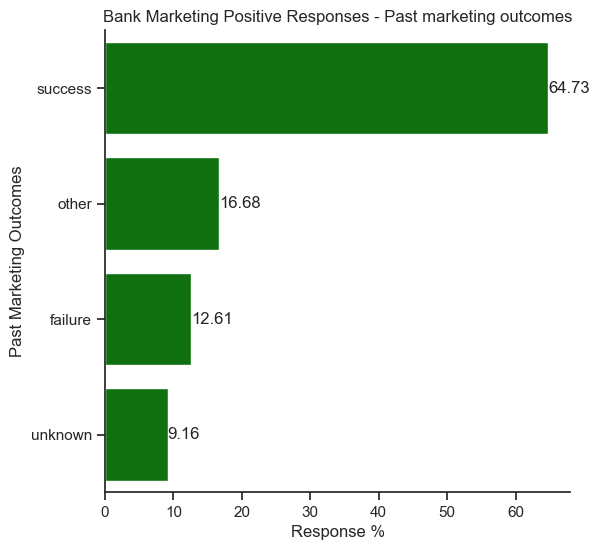

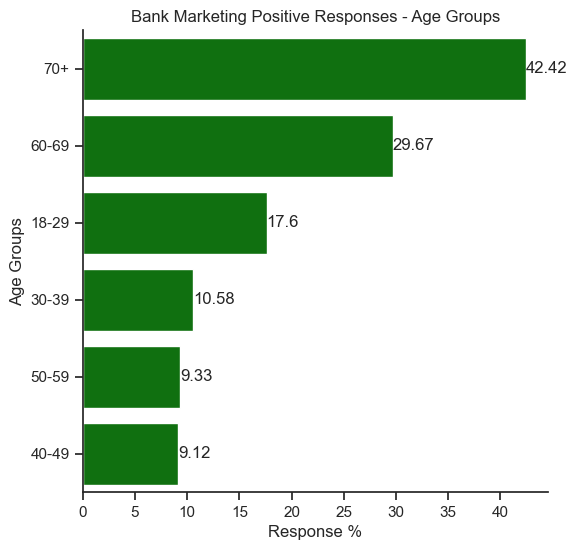

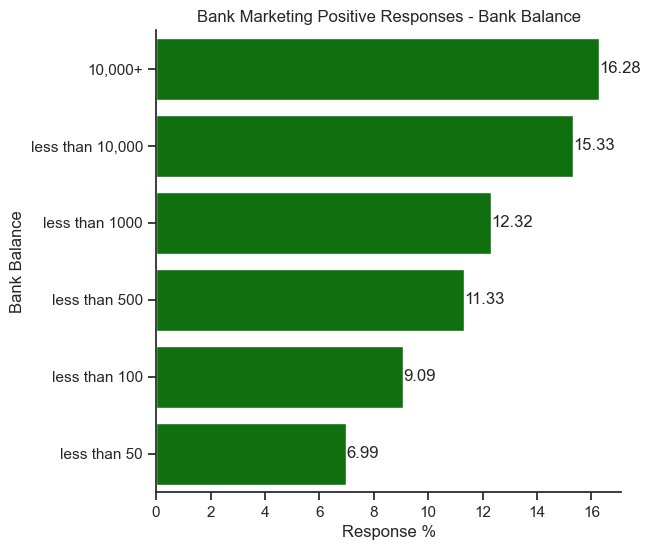

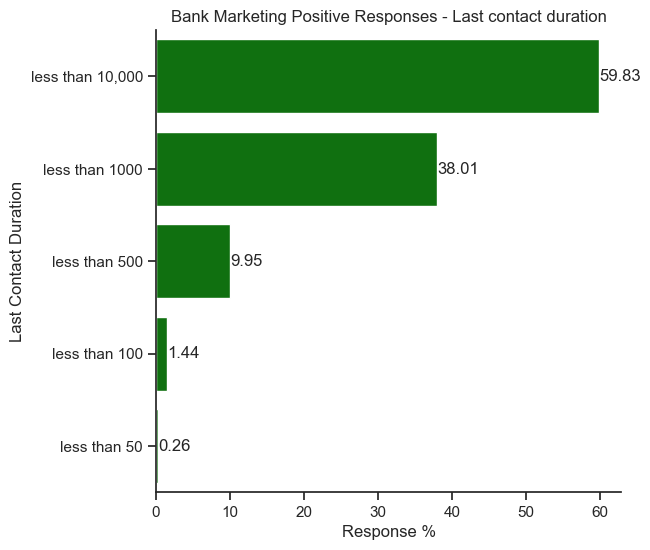

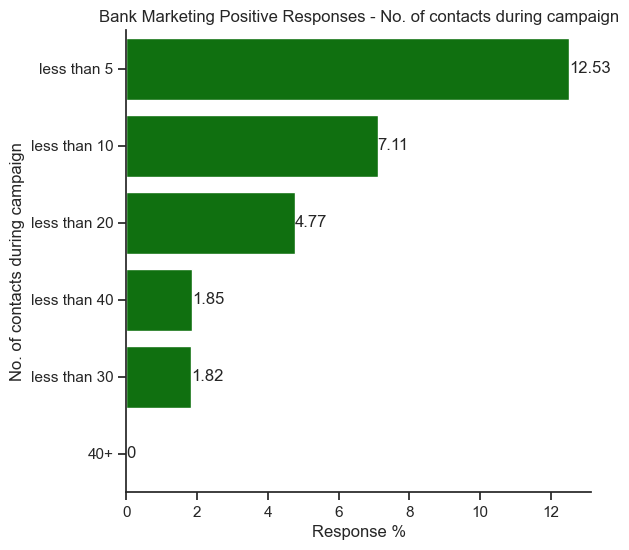

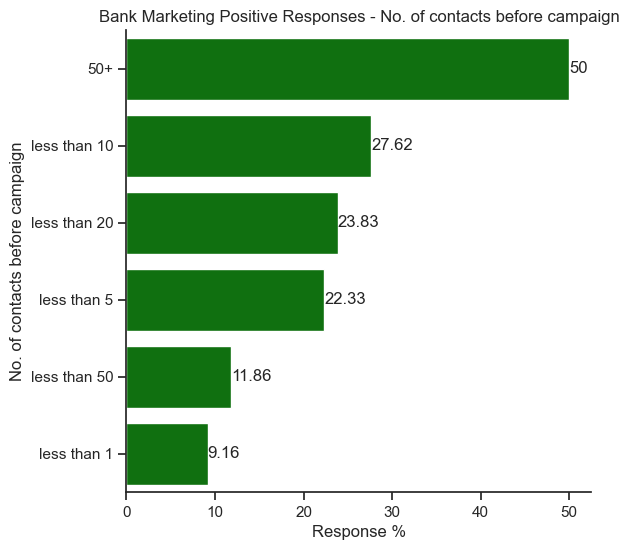

In [40]:
plt.figure(figsize=(6, 6))
g= sns.barplot(
    data=jobs_df_pos,
    y="Jobs", x="Pos_Rsp %", orient="h", color='green', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Positive Responses - Occupation')
plt.xlabel('Response %')
plt.ylabel('Occupation')
plt.show()

plt.figure(figsize=(6, 6))
g= sns.barplot(
    data=marital_df_pos,
    x="marital status", y="Pos_Rsp %", color='green', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Positive Responses - Martial Status')
plt.ylabel('Response %')
plt.xlabel('Martial Status')
plt.show()

plt.figure(figsize=(6, 6))
g= sns.barplot(
    data=educ_df_pos,
    x="education", y="Pos_Rsp %", color='green', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Positive Responses - Education Level')
plt.ylabel('Response %')
plt.xlabel('Education Level')
plt.show()

plt.figure(figsize=(6, 6))
g= sns.barplot(
    data=def_df_pos,
    x="default", y="Pos_Rsp %", color='green', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Positive Responses - Default Status')
plt.ylabel('Response %')
plt.xlabel('Default Status')
plt.show()

plt.figure(figsize=(6, 6))
g= sns.barplot(
    data=hou_df_pos,
    x="housing", y="Pos_Rsp %", color='green', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Positive Responses - Housing Loan')
plt.ylabel('Response %')
plt.xlabel('Housing Loan')
plt.show()

plt.figure(figsize=(6, 6))
g= sns.barplot(
    data=loan_df_pos,
    x="loan", y="Pos_Rsp %", color='green', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Positive Responses - Loan Status')
plt.ylabel('Response %')
plt.xlabel('Loan Status')
plt.show()

plt.figure(figsize=(6, 6))
g = sns.barplot(
    data=contact_df_pos, 
    x="contact", y="Pos_Rsp %", color='green', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Positive Responses - Contact Method')
plt.ylabel('Response %')
plt.xlabel('Contact Method')
plt.show()

plt.figure(figsize=(6, 6))
g = sns.barplot(
    data=poutcome_df_pos,
    y="poutcome", x="Pos_Rsp %", orient="h", color='green', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Positive Responses - Past marketing outcomes')
plt.xlabel('Response %')
plt.ylabel('Past Marketing Outcomes')
plt.show()

plt.figure(figsize=(6, 6))
g = sns.barplot(
    data=age_df_pos,
    y="age groups", x="Pos_Rsp %", orient="h", color='green', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Positive Responses - Age Groups')
plt.xlabel('Response %')
plt.ylabel('Age Groups')
plt.show()

plt.figure(figsize=(6, 6))
g = sns.barplot(
    data=balance_df_pos,
    y="balance groups", x="Pos_Rsp %" , orient="h", color='green', width=0.8
)
for num in g.containers:
    g.bar_label(num) 


plt.title('Bank Marketing Positive Responses - Bank Balance')
plt.xlabel('Response %')
plt.ylabel('Bank Balance') 
plt.show()

plt.figure(figsize=(6, 6))
g = sns.barplot(
    data=duration_df_pos,
    y="duration groups", x="Pos_Rsp %", orient="h", color='green', width=0.8
)
for num in g.containers:
    g.bar_label(num) 


plt.title('Bank Marketing Positive Responses - Last contact duration')
plt.xlabel('Response %')
plt.ylabel('Last Contact Duration') 
plt.show()

plt.figure(figsize=(6, 6))
g = sns.barplot(
    data=campaign_df_pos,
    y="campaign groups", x="Pos_Rsp %", orient="h", color='green', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Positive Responses - No. of contacts during campaign')
plt.xlabel('Response %')
plt.ylabel('No. of contacts during campaign') 
plt.show()

plt.figure(figsize=(6, 6))
g = sns.barplot(
    data=previous_df_pos,
    y="previous groups", x="Pos_Rsp %", orient="h", color='green', width=0.8
)
for num in g.containers:
    g.bar_label(num) 

plt.title('Bank Marketing Positive Responses - No. of contacts before campaign')
plt.xlabel('Response %')
plt.ylabel('No. of contacts before campaign') 
plt.show()

## Decision Tree

In [41]:
bank_mkt

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Age Groups
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50-59
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40-49
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30-39
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40-49
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,50-59
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,70+
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,70+
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,50-59


In [42]:


bank_mkt_dt = bank_mkt.copy()


d = {'management': 0,'technician': 1, 'entrepreneur': 2, 'blue-collar': 3,
       'unknown': 4, 'retired': 5, 'admin.' : 6, 'services': 7, 'self-employed': 8,
       'unemployed': 9, 'housemaid': 10, 'student': 11}

bank_mkt_dt['job'] = bank_mkt_dt['job'].map(d)

d = {'married': 0, 'single': 1, 'divorced': 2}
bank_mkt_dt['marital'] = bank_mkt_dt['marital'].map(d)

d = {'tertiary': 0, 'secondary': 1, 'unknown': 2, 'primary': 3}
bank_mkt_dt['education'] = bank_mkt_dt['education'].map(d)

d = {'yes': 1, 'no': 0}
bank_mkt_dt['default'] = bank_mkt_dt['default'].map(d)

d = {'yes': 1, 'no': 0}
bank_mkt_dt['housing'] = bank_mkt_dt['housing'].map(d)

d = {'yes': 1, 'no': 0}
bank_mkt_dt['loan'] = bank_mkt_dt['loan'].map(d)

d = {'unknown': 0, 'cellular': 1, 'telephone': 2}
bank_mkt_dt['contact'] = bank_mkt_dt['contact'].map(d)

d = {'may': 0, 'jun': 1, 'jul': 2, 'aug': 3, 'oct': 4, 'nov': 5, 'dec': 6, 'jan': 7, 'feb': 8, 'mar': 9, 'apr': 10, 'sep': 11}
bank_mkt_dt['month'] = bank_mkt_dt['month'].map(d)

d = {'unknown': 0, 'failure': 1, 'other': 2, 'success': 3}
bank_mkt_dt['poutcome'] = bank_mkt_dt['poutcome'].map(d)

d = {'yes': 1, 'no': 0}
bank_mkt_dt['y'] = bank_mkt_dt['y'].map(d)

In [ ]:
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'poutcome']

X = bank_mkt_dt[features]
y = bank_mkt_dt['y']

#sns.set(style='darkgrid') 
#sns.set_theme(style='darkgrid')
sns.set_theme(color_codes=True)
#fig, axe = plt.subplots(figsize=(20,10))
plt.figure(figsize=(30, 250))


# Separating Training and Testing data
X, X_test, y, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

dtree = DecisionTreeClassifier(criterion="gini")
dtree = dtree.fit(X, y)



#plt.savefig("mygraph.png")
#sys.stdout.flush()
#plt.savefig(sys.stdout.buffer) 


#plot_tree(dtree, filled=True)
plt.title("Original Decision Tree")
tree.plot_tree(dtree, feature_names=features, fontsize=20, filled=True) 
plt.show()
sys.stdout.flush()


# Model Accuracy before pruning
accuracy_before_pruning = dtree.score(X, y)
print("Accuracy before pruning:", accuracy_before_pruning)

### Based on the accurcay level, I don't think pruning is needed. Though pruing could help reduce the layers in which the tree has, but this could lead to a reduction in accuracy. Reduced error pruning might be beneficial for this project, as it remove data that does not have a significant impact. But based on the calculations I performed earlier, data that have a significant impact can be easily identified. A clients response to past campaign has the highest impact. If a client responded positively to past campaign, there is a high likely that they will react positively to future campaigns. 

In [ ]:
print(dtree.predict([[78, 1, 2, 1, 0, 30, 0, 0, 1, 0, 5, 1, 0, 1, 3]])) 